In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2017-cleaned-data/cleaned_data.csv
/kaggle/input/cleaned-data2/cleaned_data2.csv


In [2]:
# !pip install --quiet --upgrade scikit-learn imbalanced-learn
# import os
# os._exit(0)  # This will restart the kernel

In [3]:
data = pd.read_csv("/kaggle/input/cleaned-data2/cleaned_data2.csv")

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['Attack_Type'])  # Replace with your actual target column name
y = data['Attack_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)


In [6]:
# # Apply SMOTE before fitting
# X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)


In [7]:
random_forest_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

In [8]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [9]:
import joblib
joblib.dump(random_forest_pipeline, "rf_pipeline_without_smote.pkl")

['rf_pipeline_without_smote.pkl']

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = random_forest_pipeline.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

      BENIGN     0.9990    0.9993    0.9992    628518
         Bot     0.8672    0.7825    0.8227       584
 Brute Force     1.0000    0.9964    0.9982      2745
        DDoS     0.9999    0.9997    0.9998     38404
         DoS     0.9983    0.9969    0.9976     58124
    PortScan     0.9895    0.9895    0.9895     27208
  Web Attack     0.9843    0.9751    0.9797       643

    accuracy                         0.9986    756226
   macro avg     0.9769    0.9628    0.9695    756226
weighted avg     0.9986    0.9986    0.9986    756226



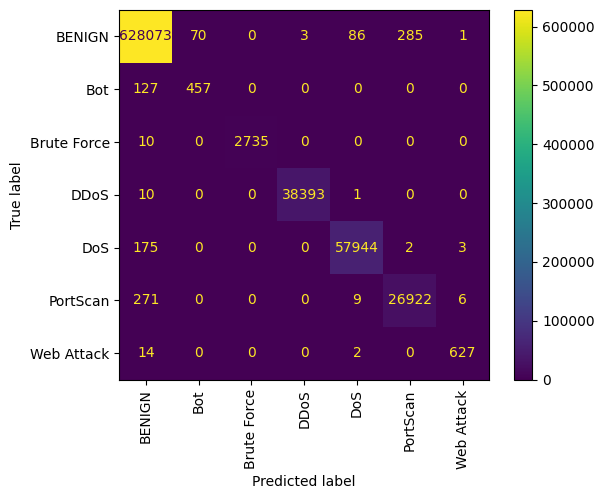

In [11]:

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')


In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Macro-averaged scores (handles imbalance)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Macro F1-score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")


Macro F1-score: 0.9695
Macro Precision: 0.9769
Macro Recall: 0.9628
